Fitting line: -5.706656X^2 + 1.431515X^1 + 8.999492270942895
Total error:  1.4830585018155022e-26


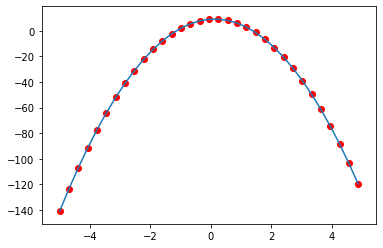

In [3]:
import math
import sys
import copy
import matplotlib.pyplot as plt
%matplotlib inline

def inverse_matrix(matrix):
    inverse_matrix=[[0 if i!=j else 1 for i in range(len(matrix)) ] \
        for j in range(len(matrix))]
    
    for i in range(len(matrix)):
        if i==0:
            div_num=matrix[i][0]
            for j in range(len(matrix[i])):
                matrix[i][j] /=div_num
                inverse_matrix[i][j] /=div_num
        else:
            for k in range(i,len(matrix)):
                mul= -(matrix[k][i-1]/matrix[i-1][i-1])
                for  j in range(len(matrix[k])):
                    matrix[k][j]=matrix[i-1][j]*mul+matrix[k][j]
                    inverse_matrix[k][j] =inverse_matrix[i-1][j]*mul+inverse_matrix[k][j]
                    
    final_index=len(matrix)-1
    last=len(matrix[0])-1

    for i in range(len(matrix)):
        index=final_index-i
        if index==final_index:
            div_num=matrix[index][last]
            for j in range(len(matrix[index])):
                matrix[index][j] /=div_num
                inverse_matrix[index][j] /=div_num
        else:
            div_num=matrix[index][index]
            for z in range(len(matrix[index])):
                matrix[index][z] /=div_num
                inverse_matrix[index][z] /=div_num
            for k in range(i,len(matrix)):
                ind=final_index-k
                mul= -(matrix[ind][index+1]/matrix[index+1][index+1])
                for j in range(len(matrix[k])):
                    matrix[ind][j]=matrix[index+1][j]*mul+matrix[ind][j]
                    inverse_matrix[ind][j] =inverse_matrix[index+1][j]*mul+inverse_matrix[ind][j]

    return inverse_matrix

def multiply_matrix(matrix_a,matrix_b):
    mul_matrix=[[0 for i in range(len(matrix_b[0]))] \
        for j in range(len(matrix_a))]
    
    for i in range(len(matrix_a)):
        for j in range(len(matrix_b[i])):
            for k in range(len(matrix_a[i])):
                mul_matrix[i][j] +=matrix_a[i][k]*matrix_b[k][j]

    return mul_matrix            


fp=open('linear_data.txt',"r")
arr=[]
line=fp.readline()
while line:
    line=line.strip('\n').split(',')
    arr.append(line)
    line=fp.readline()

polynomal_base=3

answer_vector=[ [ float(arr[i][1]) ] for i in range(len(arr)) ]
data_vector=[ [ float(arr[i][0]) ] for i in range(len(arr)) ]

data_matrix=[]
for i in range(len(arr)):
    data_matrix.append([])
    for j in range(polynomal_base):
        data_matrix[i].append(math.pow(float(arr[i][0]),j))

data_matrix_transpose=[ [] for i in range(len(data_matrix[0]))]
for i in range(len(data_matrix[0])):
    for j in range(len(data_matrix)):
        data_matrix_transpose[i].append(0)

for i in range(len(data_matrix)):
    for j in range(len(data_matrix[i])):
        data_matrix_transpose[j][i]=data_matrix[i][j]
mul_matrix=multiply_matrix(data_matrix_transpose,data_matrix)
inv_matrix=inverse_matrix(mul_matrix)

matrix_tmp=multiply_matrix(data_matrix_transpose,answer_vector)

x=multiply_matrix(inv_matrix,matrix_tmp)

test_matrix=[[2,2,1],[1,3,2],[-2,1,2]]
in_test_matrix=inverse_matrix(test_matrix)

print("Fitting line:",end='')
for i in range(len(x)-1,-1,-1):
    if i!=0:
        msg=" %fX^%d +"%(x[i][0],i)
        print(msg,end='')
    else:
        print('',x[i][0])
error_sum=0.0

y_arr=[]
for i in range(len(answer_vector)):
    distence=answer_vector[i][0]
    sumx=0
    
    for j in range(len(x)-1,-1,-1):
        tmp=data_vector[i][0]
        #print(tmp)
        tmp=math.pow(tmp,j)
        sumx+=x[j][0]*tmp
    
    y_arr.append(sumx)
    distence=distence-sumx
    error_sum +=math.pow(distence,2)

error_sum=0.5*error_sum
print("Total error: ",error_sum)
x_arr=[ num[0] for num in data_vector]
y_arr2=[num[0] for num in answer_vector]
plt.plot(x_arr,y_arr)
plt.scatter(x_arr,y_arr2,color='r')
plt.show()